#  Contexte

Les maladies cardiovasculaires (MCV) sont la première cause de décès dans le monde, faisant environ 17,9 millions de vies chaque année, ce qui représente 31 % de tous les décès dans le monde. Quatre décès sur 5 par MCV sont dus à des crises cardiaques et à des accidents vasculaires cérébraux, et un tiers de ces décès surviennent prématurément chez des personnes de moins de 70 ans. L'insuffisance cardiaque est un événement courant causé par les maladies cardiovasculaires et cet ensemble de données contient 11 caractéristiques qui peuvent être utilisées pour prédire une éventuelle maladie cardiaque. Les personnes atteintes de maladies cardiovasculaires ou à haut risque cardiovasculaire (en raison de la présence d'un ou plusieurs facteurs de risque tels que l'hypertension, le diabète, l'hyperlipidémie ou une maladie déjà établie) ont besoin d'une détection et d'une gestion précoces dans lesquelles un modèle d'apprentissage automatique peut être d'une grande aide.

# Description des métadonnées

AGE : âge du patient SEXE : sexe du patient [homme, femme] TDT : type de douleur thoracique [AT : angine typique, AA : angine atypique, DNA : douleur non angineuse, ASY : asymptomatique] PAR : pression artérielle au repos [mm Hg] CHOLESTEROL : cholestérol sérique [mm/dl] GAJ : glycémie à jeun [1 : si glycémie à jeun > 120 mg/dl, 0 : sinon] ECG au repos : résultats de l'électrocardiogramme au repos [Normal : normal, ST : présentant une anomalie de l'onde ST-T , HVG : montrant une hypertrophie ventriculaire gauche probable] FCMAX : fréquence cardiaque maximale atteinte ANGINE : angine induite par l'exercice [Oui, Non] DEPRESSION : Valeur numérique mesurée en dépression PENTE: la pente du segment ST d'exercice de pointe [Ascendant, Plat, Descendant] COEUR : maladie cardiaque[1 : Présence de la maladie, 0 : Absence de la maladie]

In [149]:
import pandas as pd
import numpy as np
import os

import matplotlib.pylab as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [194]:
#changer de répertoir de travail
os.chdir('C:\\Users\Admin\Desktop\Docier_pandas')

In [195]:
#lire le contenue de la data_frame
df = pd.read_excel(r"C:\Users\Admin\Desktop\Docier_pandas\mcv.xlsx") 

In [196]:
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
df.shape

(918, 12)

In [ ]:
AGE,

In [8]:
#notre df contient 12 variables (12 colones et 918 lignes)

In [9]:
df.isna().sum()

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

# Preprocessing

In [25]:
#Encodage des variables qualitatives

In [197]:
df_copie = df

In [198]:
df_quali = df_copie.select_dtypes(object)

In [199]:
df_quali

,SEXE,TDT,ECG,ANGINE,PENTE
0,homme,AA,Normal,Non,Ascendant
1,femme,DNA,Normal,Non,Plat
2,homme,AA,ST,Non,Ascendant
3,femme,ASY,Normal,Oui,Plat
4,homme,DNA,Normal,Non,Ascendant
...,...,...,...,...,...
913,homme,AT,Normal,Non,Plat
914,homme,ASY,Normal,Non,Plat
915,homme,ASY,Normal,Oui,Plat
916,femme,AA,LVH,Non,Plat


In [241]:
#Listes des variables qualitatives et quantitives
variable_quali = ["SEXE","TDT","ECG","ANGINE","PENTE","GAJ","CŒUR"]
variable_quanti = ["AGE","PAR","CHOLESTEROL","FCMAX","DEPRESSION "]

In [201]:
#fonction d'encodage des variables qualitatives
def encodage_var_quali(df):
    df.ECG.replace({'Normal': 0, 'ST': 1,'LVH':2}, inplace=True)
    df.SEXE.replace({'femme': 0, 'homme': 1}, inplace=True)
    df.ANGINE.replace({'Oui': 1, 'Non': 0}, inplace=True)
    df.TDT.replace({'AT': 0, 'AA': 1,'DNA':2,'ASY':3}, inplace=True)
    df.PENTE.replace({'Ascendant': 0,'Plat': 1, 'Descendant': 2}, inplace=True)
    return df

In [202]:
df_encod =encodage_var_quali(df_copie)

In [203]:
df_encod

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,1,1,140,289,0,0,172,0,0.0,0,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,0,0
3,48,0,3,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,110,264,0,0,132,0,1.2,1,1
914,68,1,3,144,193,1,0,141,0,3.4,1,1
915,57,1,3,130,131,0,0,115,1,1.2,1,1
916,57,0,1,130,236,0,2,174,0,0.0,1,1


In [204]:
#Normalisation des variables quantitatives

In [205]:
#Normalisation des variables quantitatives
for i in variable_quanti:
    mean = df_encod[i].mean()
    std = df_encod[i].std()
    df_encod[i] = df_encod[i].map(lambda x:(x-mean)/std)

In [206]:
#data set encodé et normalisé
df_encod.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,-1.432359,1,1,0.410685,0.824621,0,0,1.382175,0,-0.831979,0,0
1,-0.478223,0,2,1.490940,-0.171867,0,0,0.753746,0,0.105606,1,1
2,-1.750404,1,1,-0.129442,0.769768,0,1,-1.524307,0,-0.831979,0,0
3,-0.584238,0,3,0.302660,0.138964,0,0,-1.131539,1,0.574398,1,1
4,0.051853,1,2,0.950812,-0.034736,0,0,-0.581664,0,-0.831979,0,0


In [207]:
#Selection des variables les plus qui ont plus d'afluence sur la variable CŒUR

[0.07188944 0.05096982 0.12736216 0.0681613  0.09148991 0.04633882
 0.03630513 0.08531912 0.13368744 0.0875819  0.20089496]


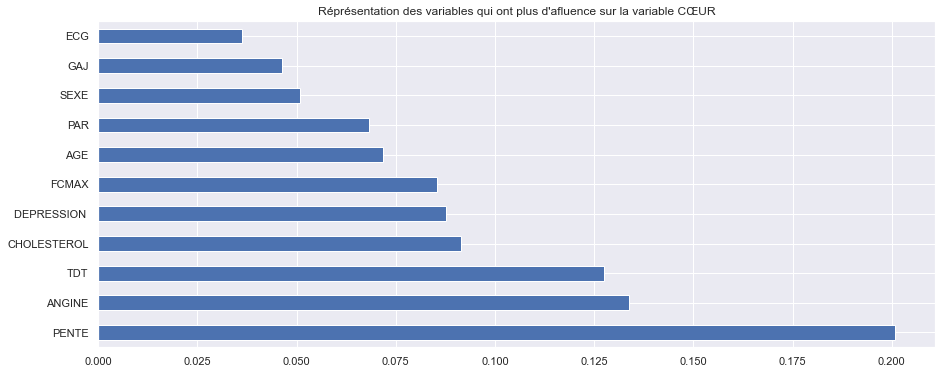

In [208]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.title('Réprésentation des variables qui ont plus d\'afluence sur la variable CŒUR')
plt.show()

In [213]:
X = df_encod.drop('CŒUR',axis=1)
y = df_encod.CŒUR

In [216]:
#Diviser le dataset en trainset et testset

In [210]:
from sklearn.model_selection import train_test_split

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 50)

In [215]:
X_train

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE
686,0.369898,0,3,-0.669570,1.418857,0,0,1.028684,1,-0.269428,0
468,0.899974,1,3,1.058838,-0.418704,0,1,-1.563584,1,0.668157,0
455,0.581928,1,3,1.166863,-1.817444,0,1,-0.228173,1,0.574398,0
917,-1.644389,1,2,0.302660,-0.217578,0,0,1.421452,0,-0.831979,0
524,0.157868,1,3,0.950812,-0.354709,0,1,0.518086,0,-0.831979,0
...,...,...,...,...,...,...,...,...,...,...,...
289,-1.856420,1,1,-0.669570,-0.299857,0,0,1.696389,0,-0.831979,0
109,-1.538374,1,1,3.111322,0.385800,0,0,-1.210093,0,-0.831979,0
907,-1.008299,1,3,-0.669570,-0.272430,0,0,0.282425,1,1.793259,2
480,0.475913,1,1,-0.345493,-1.817444,1,0,-1.052986,1,1.043191,1


# Construction des models

# Régression logistique

In [217]:
from sklearn.metrics import classification_report

In [218]:
# Construction du modèle
classifier = LogisticRegression(random_state = 0, solver='liblinear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
score_train = classifier.score(X_train,y_train)
score_test = classifier.score(X_test,y_test)

print(score_train)
print(score_test)

0.8546511627906976
0.8608695652173913


In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Partage du data_set en train et test:
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier

In [222]:
# model_logistique.fit(X_train,y_train)
def evaluation_losiqtique(classifier):
    y_pred = classifier.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(classifier, X_train, y_train, cv=4,scoring = 'f1', train_sizes = np.linspace(0.1, 1 , 10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label= 'train score')
    plt.plot(N, val_score.mean(axis=1), label= 'validation score')
    plt.legend()

[[ 91  18]
 [ 14 107]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       109
           1       0.86      0.88      0.87       121

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



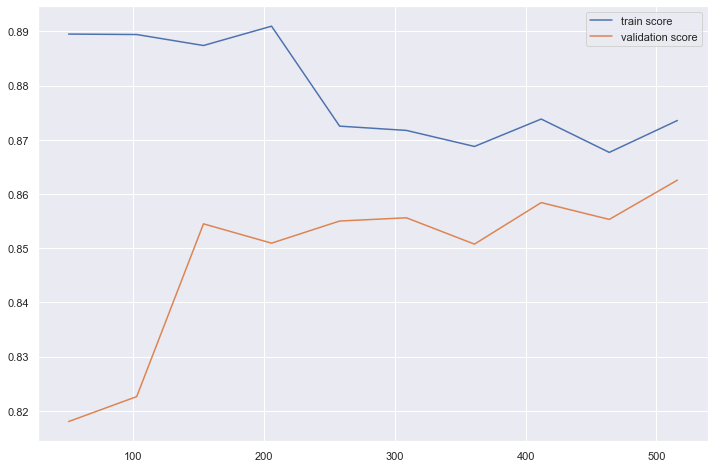

In [223]:
evaluation_losiqtique(classifier)

# Arbre de décision 

In [226]:
model = DecisionTreeClassifier(random_state=0)
model

DecisionTreeClassifier(random_state=0)

In [227]:
def evaluation(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
#     
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4,scoring = 'f1', train_sizes = np.linspace(0.1, 1 , 10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label= 'train score')
    plt.plot(N, val_score.mean(axis=1), label= 'validation score')
    plt.legend()

[[85 24]
 [25 96]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       109
           1       0.80      0.79      0.80       121

    accuracy                           0.79       230
   macro avg       0.79      0.79      0.79       230
weighted avg       0.79      0.79      0.79       230



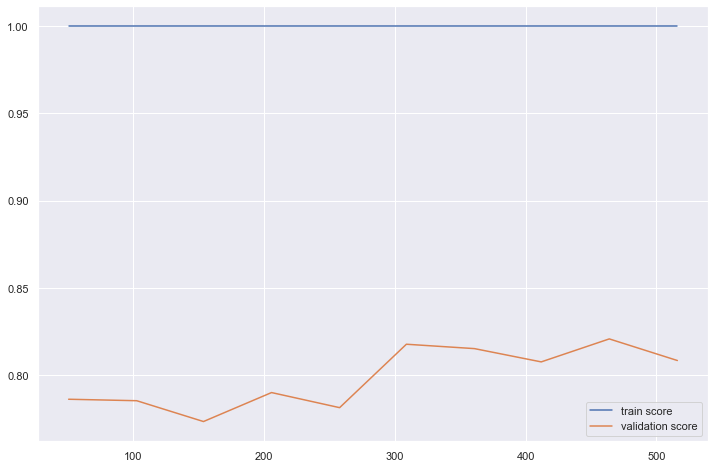

In [228]:
evaluation(model)

# KNK

In [229]:
from sklearn.neighbors import KNeighborsClassifier

In [231]:
model_knn = KNeighborsClassifier()

In [232]:
model_knn.fit(X_train, y_train)
model_knn.score(X_train, y_train)

0.873546511627907

In [233]:
model_knn.score(X_test, y_test)

0.8347826086956521

In [234]:
#fonction d'évaluation du model
def evaluation_knn(model_knn):
    model_knn.fit(X_train,y_train)
    y_pred = model_knn.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model_knn, X_train, y_train, cv=4,scoring = 'f1', train_sizes = np.linspace(0.1, 1 , 10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label= 'train score')
    plt.plot(N, val_score.mean(axis=1), label= 'validation score')
    plt.legend()

[[ 91  18]
 [ 20 101]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       109
           1       0.85      0.83      0.84       121

    accuracy                           0.83       230
   macro avg       0.83      0.83      0.83       230
weighted avg       0.84      0.83      0.83       230



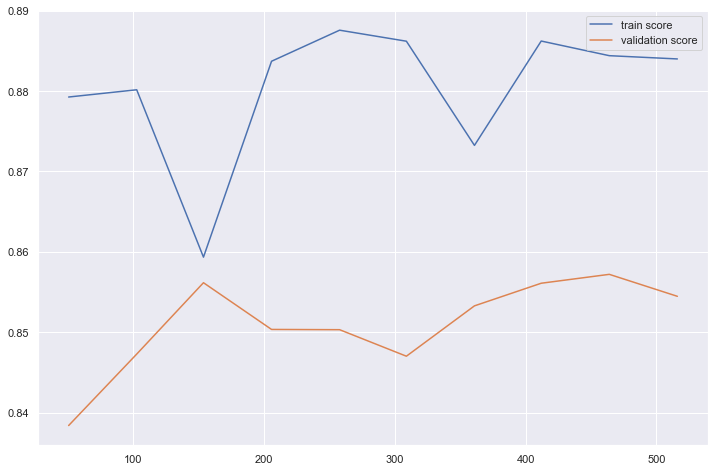

In [235]:
evaluation_knn(model_knn)

# Boosting

In [236]:
from sklearn.ensemble import GradientBoostingClassifier

In [237]:
model_boost = GradientBoostingClassifier(n_estimators=40,max_depth=10,random_state=20) 
model_boost.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=40, random_state=20)

In [238]:
#score des model
print(model_boost.score(X_train, y_train))
print(model_boost.score(X_test, y_test))

1.0
0.7956521739130434


In [239]:
#fonction d'évaluation du model
def evaluation_boost(model_boost):
    model_boost.fit(X_train,y_train)
    y_pred = model_boost.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model_boost, X_train, y_train, cv=4,scoring = 'f1', train_sizes = np.linspace(0.1, 1 , 10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label= 'train score')
    plt.plot(N, val_score.mean(axis=1), label= 'validation score')
    plt.legend()

[[84 25]
 [22 99]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       109
           1       0.80      0.82      0.81       121

    accuracy                           0.80       230
   macro avg       0.80      0.79      0.79       230
weighted avg       0.80      0.80      0.80       230



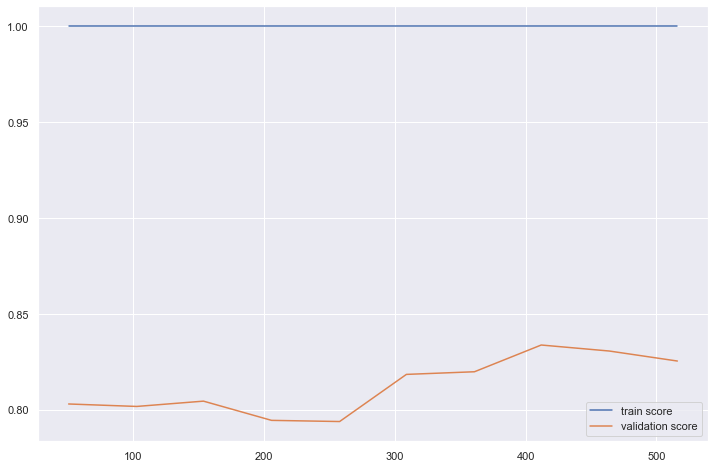

In [240]:
evaluation_boost(model_boost)